# Clothes Classifier
## Stage 1

In [1]:
from fastai import *
from fastai.vision import *

(['buttonup', 'jacket', 'jeans', 'shorts', 'trousers', 'tshirt'], 6, 960, 240)

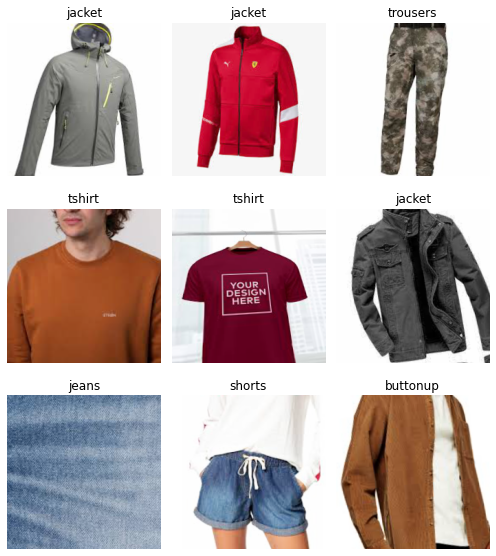

In [2]:
path = Path('data/clothes')
classes = ['jeans','trousers','jacket', 'shorts', 'tshirt', 'buttonup']

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

data.classes

data.show_batch(rows=3, figsize=(7,8))
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

In [3]:
learner = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])

In [4]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.196996,0.793690,0.245833,0.754167,00:05
1,1.357838,0.697615,0.183333,0.816667,00:03
2,0.993245,0.648529,0.195833,0.804167,00:03
3,0.790995,0.656446,0.204167,0.795833,00:03


In [5]:
learner.save('stage-1')

In [6]:
interp = ClassificationInterpretation.from_learner(learner)

losses,idxs = interp.top_losses()

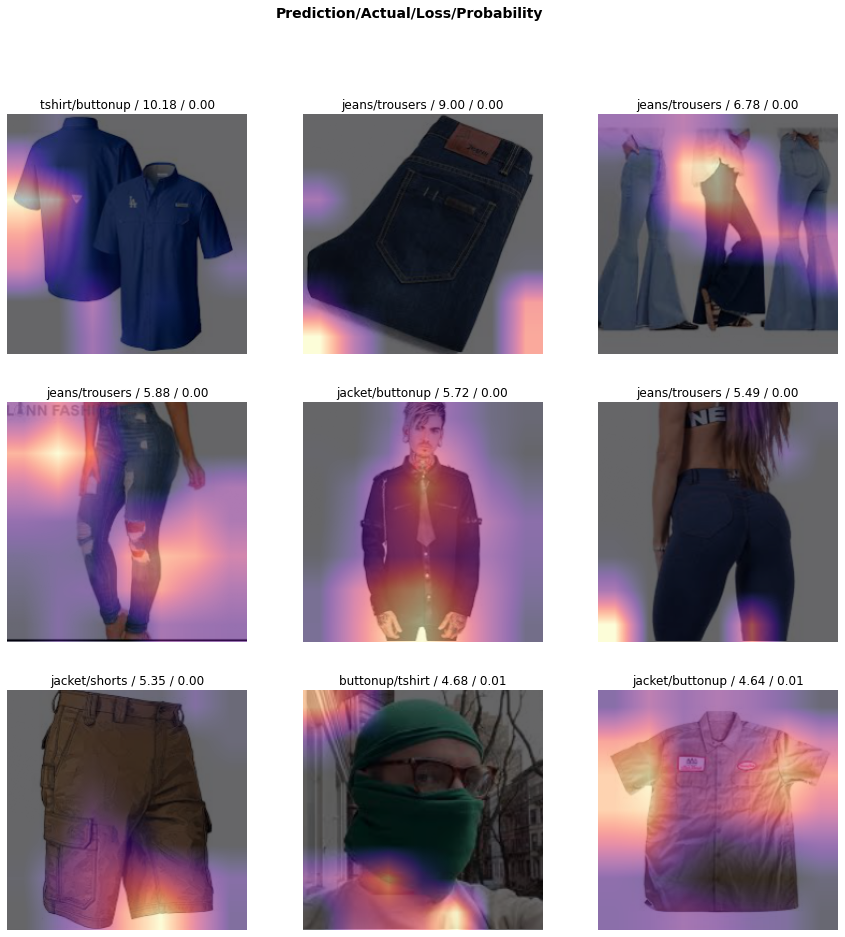

In [7]:
interp.plot_top_losses(9, figsize=(15,15), heatmap=True)

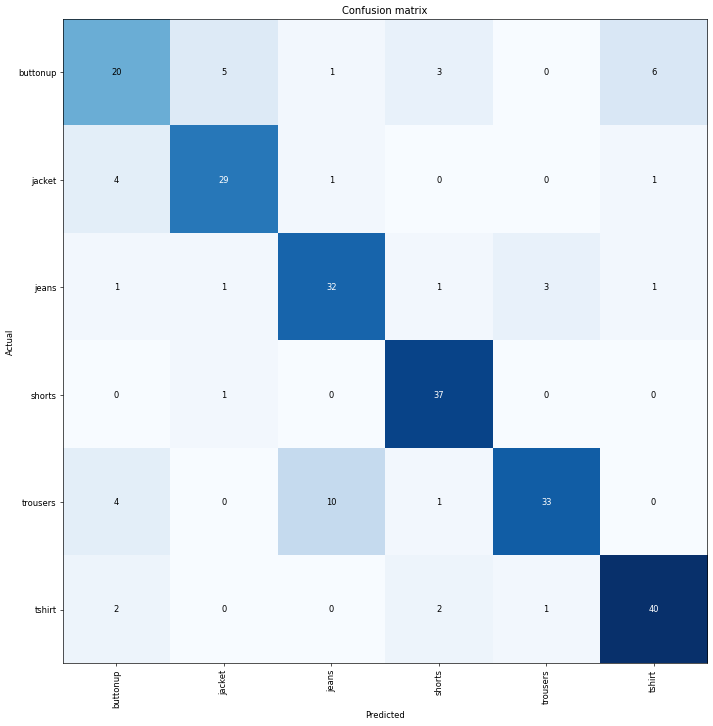

In [8]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

## Stage 2

In [9]:
learner.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (960 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
jeans,jeans,jeans,jeans,jeans
Path: data/clothes;

Valid: LabelList (240 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
jacket,tshirt,jeans,buttonup,jeans
Path: data/clothes;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

In [10]:
learner.unfreeze()

In [11]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


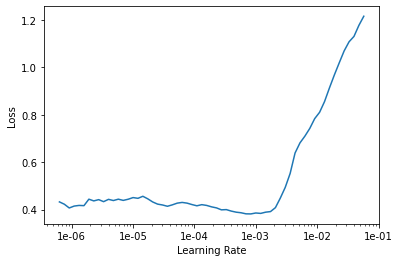

In [12]:
learner.recorder.plot()

In [13]:
learner.fit_one_cycle(8, max_lr=slice(5e-6,5e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.419471,0.627991,0.183333,0.816667,00:03
1,0.399425,0.662364,0.200000,0.800000,00:03
2,0.352086,0.640240,0.191667,0.808333,00:03
3,0.288325,0.600854,0.179167,0.820833,00:03
4,0.249917,0.598537,0.179167,0.820833,00:03
5,0.209220,0.573499,0.166667,0.833333,00:03
6,0.180809,0.574403,0.175000,0.825000,00:03
7,0.166547,0.580085,0.170833,0.829167,00:03


In [14]:
learner.save('stage-2')

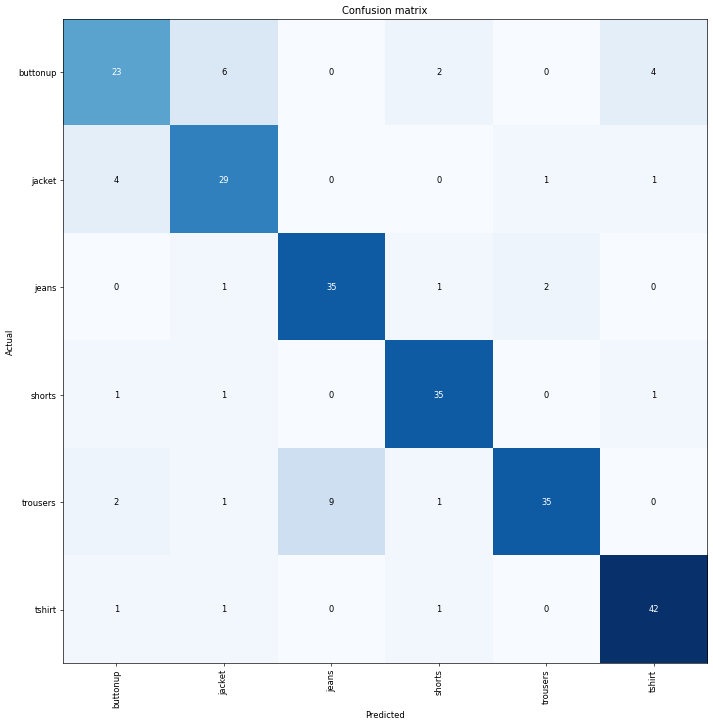

In [15]:
interp = ClassificationInterpretation.from_learner(learner)

losses,idxs = interp.top_losses()
# interp.plot_top_losses(9, figsize=(15,15), heatmap=True)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)